# **Task 1 - Synfire Chain (Simple)**
This task will create a network known as a "Synfire chain" (which stands for synchronous firing chain). In this network, a neuron or set of neurons spike and cause activity in an ongoing chain of neurons or populations, which then repeats. The neural impulses thus propagate synchronously back and forth from neuron (population) to neuron (population). 

In this implementation, each neuron feeds excitatory connections to the next neuron in the chain, and the last neuron feeds the first one to close the loop. An external spike to the first neuron triggers the overall activity.

**Run the following cell before you start!**

In [ ]:
# RUN THIS CELL
!pip install brian2
from brian2 import *

     |████████████████████████████████| 1.2MB 9.2MB/s 
     |████████████████████████████████| 5.8MB 28.7MB/s 
  Created wheel for brian2: filename=Brian2-2.4.2-cp36-cp36m-linux_x86_64.whl size=1257550 sha256=b40c2c35c7e42a16f7eff028757caca6e008a32e1d1d9e0fdb832666fcaba6ec
  Stored in directory: /root/.cache/pip/wheels/5d/4b/cf/ef50e71df5479d67f981cbb17b1d842381019d27ba144d57de
Successfully built brian2
  Found existing installation: sympy 1.1.1
    Uninstalling sympy-1.1.1:
      Successfully uninstalled sympy-1.1.1


Setup the simulation to use 1ms timesteps.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

dt = 1. * ms
defaultclock.dt = dt

Create an input population of 1 source spiking at 0ms.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

pop_in = SpikeGeneratorGroup(1, times=[0] * ms, indices=[0])

Create a LIF population with 100 neurons. Set both membrane and synapse time constants to 10ms, the refractory period to 5ms, the threshold to -50mV, the resting potential to -70mV and the reset equal to the resting value.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

tau_m = 10 * ms
tau_s = 10 * ms
tau_ref = 5 * ms
u_th = -50 * mV
u_rest = -70 * mV
u_reset = -70 * mV
model = '''
du/dt = - (u - u_rest - u_s) / tau_m   : volt     (unless refractory)
du_s/dt = - u_s / tau_s                : volt
'''
pop_out = NeuronGroup(100, model=model, threshold='u >= u_th', reset='u = u_reset', refractory=tau_ref, method='euler')
pop_out.u = u_rest

Connect the input population to the first neuron of the Synfire population, with a weight of 70mV and a delay of 1ms.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

syn_in_out = Synapses(pop_in, pop_out, model="""w : volt""", on_pre='u_s += w',  delay=1. * ms)
syn_in_out.connect(i=0, j=0)
syn_in_out.w = 70 * mV

Connect each neuron in the Synfire population to the next neuron and the last with the first (hint: use conditions in the "*connect*" method of the synapse object to establish the connectivity and connect the last with the first through a separate call to the same method). Use the given function to visualise the connectity (it takes the synaptic object as argument). Set a weight of 60mV and a delay of 5ms.

In [ ]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(12, 6))
    subplot(121)
    plot(np.zeros(Ns), np.arange(Ns), 'ok', ms=8)
    plot(np.ones(Nt), np.arange(Nt), 'ok', ms=8)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')
    show()

# Write your code here

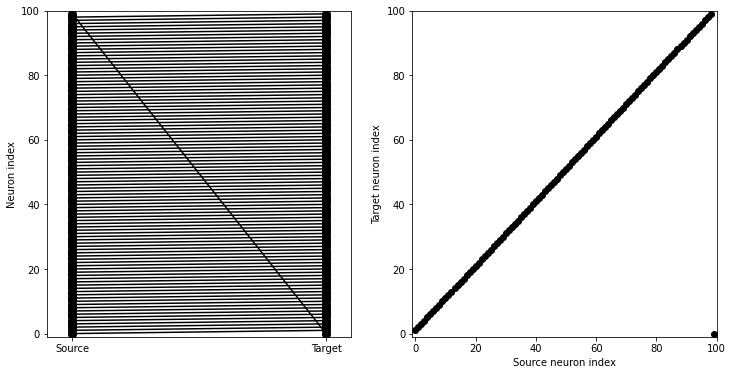

In [ ]:
#@title Double-click here for solution

syn_out_out = Synapses(pop_out, pop_out, model="""w : volt""", on_pre='u_s += w', delay=5. * ms)
syn_out_out.connect(condition='(j-i)<=1 and (j-i)>0')
syn_out_out.connect(i=pop_out.N - 1, j=0)
syn_out_out.w = 60 * mV
visualise_connectivity(syn_out_out)
# print(syn_out_out.i)
# print(syn_out_out.j)

Record the spikes produced from the Synfire populations.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

spikes_out = SpikeMonitor(pop_out)

Build the network adding all the elements.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

net = Network(pop_in, pop_out, syn_in_out, syn_out_out, spikes_out)

Run the simulation for 2 seconds

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

T = 2 * second
net.run(T, report='stdout')

Starting simulation at t=0. s for a duration of 2. s
2. s (100%) simulated in < 1s


Retrieve the spikes from the Synfire population.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

spike_times_out = spikes_out.t / ms
spike_id_out = spikes_out.i

Plot the resulting spiking activity of the Synfire population (hint: use the "*scatter*" function).

In [ ]:
# Write your code here

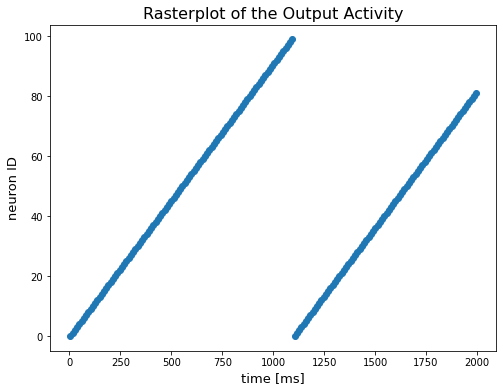

In [ ]:
#@title Double-click here for solution

figure(figsize=(8, 6))
scatter(spike_times_out, spike_id_out)
xlabel('time [ms]', fontsize=13)
ylabel('neuron ID', fontsize=13)
title('Rasterplot of the Output Activity', fontsize=16)
show()


---

#### **Extension**

Update the network above so that the delays in the connections internal to the synfire population are generated from a uniform random distribution with values between 1.0 and 15.0 (use the function "*np.random.randint*"). Update the run time to be 5 seconds.

In [ ]:
# Write your code here

In [ ]:
#@title Double-click here for solution

# ---------------- 1. Establish the time-step of the simulation ----------------
dt = 1. * ms
defaultclock.dt = dt

# ---------------------- 2. Create the neural populations ----------------------
pop_in = SpikeGeneratorGroup(1, times=[0] * ms, indices=[0])
tau_m = 10 * ms
tau_s = 10 * ms
tau_ref = 5 * ms
u_th = -50 * mV
u_rest = -70 * mV
u_reset = -70 * mV
model = '''
du/dt = - (u - u_rest - u_s) / tau_m   : volt     (unless refractory)
du_s/dt = - u_s / tau_s                : volt
'''
pop_out = NeuronGroup(100, model=model, threshold='u >= u_th', reset='u = u_reset', refractory=tau_ref, method='euler')
pop_out.u = u_rest

# --------------------------- 3. Create the synapses ---------------------------
syn_in_out = Synapses(pop_in, pop_out, model="""w : volt""", on_pre='u_s += w',  delay=1. * ms)
syn_in_out.connect(i=0, j=0)
syn_in_out.w = 70 * mV
# Change the delays in connections from the Synfire chain to itself
syn_out_out = Synapses(pop_out, pop_out, model="""w : volt""", on_pre='u_s += w')
syn_out_out.connect(condition='(j-i)<=1 and (j-i)>0')
syn_out_out.connect(i=pop_out.N - 1, j=0)
syn_out_out.w = 60 * mV
syn_out_out.delay = np.random.randint(low=1, high=15, size=len(syn_out_out)) * ms

# -------------------------- 4. Setup data monitoring --------------------------
spikes_out = SpikeMonitor(pop_out)

# -------------------- 5. Build and feed the network object --------------------
net = Network(pop_in, pop_out, syn_in_out, syn_out_out, spikes_out)

# --------------------------- 6. Run the simulation ----------------------------
T = 5 * second  # set the duration of the simulation to be of 5 seconds
net.run(T, report='stdout')

# ------------------ 7. Retrieve and plot the recorded data --------------------
spike_times_out = spikes_out.t / ms
spike_id_out = spikes_out.i
figure(figsize=(8, 6))
scatter(spike_times_out, spike_id_out)
xlabel('time [ms]', fontsize=13)
ylabel('neuron ID', fontsize=13)
title('Rasterplot of the Output Activity', fontsize=16)
show()